<a href="https://colab.research.google.com/github/kfook/Breast-Cancer-Detection/blob/main/Deteksi_Kanker_Payudara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deteksi Kanker Payudara dengan Support Vector Machine

Impor *packages*/*libraries* yang kiranya dibutuhkan dalam pengerjaan program. Data set kanker payudara yang digunakan juga diimpor dan lakukan pengecekan

In [4]:
# Mengimpor library
import pandas as pd
import seaborn as sns
sns.set()

# Mengimpor dataset
data_source = "https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/download"
url = "https://raw.githubusercontent.com/kfook/Breast-Cancer-Detection/main/breast-cancer-wisconsin.csv"
kanker = pd.read_csv(url)

Cek dimensi dari data set Kanker Payudara dengan menggunakan atribut '*shape*' dari data set panda. 

In [5]:
# Mengecek dimensi dari data set
print("Dimensi Data Set Kanker Payudara : {}".format(kanker.shape))

Dimensi Data Set Kanker Payudara : (569, 33)


Hasil eksekusi kode sebelumnya menampilkan 569 baris data yang menunjukkan adanya 569 data pasien dan 33 kolom yang menunjukkan 33 *feature data* dari setiap pasien.

Cek keberadaan kolom berisi *empty* (NaN, NAN, na) *values*.

In [6]:
# Menghitung empty (NaN, NAN, na) values di setiap kolom
kanker.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Dari hasil eksekusi kode sebelumnya, dapat dilihat bahwa tidak ada kolom yang memiliki *empty values* kecuali kolom bernama 'Unnamed: 32", yang memiliki 569 *empty values* (sejumlah banyaknya baris di data set). Karena tidak bernilai, hapus kolom 'Unnamed: 32'.

In [7]:
# Menghilangkan kolom kosong
df_kanker = kanker.dropna(axis=1)
df_kanker.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Kolom 'Diagnosis' menjadi target prediksi, apakah kanker adalah B = Benign atau M = Malignant.

In [8]:
# Memprediksi kolom 'Diagnosis'
df_kanker['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

Diketahui dari 569 orang, 357 orang tergolong B (benign) dan 212 orang tergolong M (malignant).

In [9]:
df_kanker.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

Kolom 'diagnosis' merupakan *Categorical Data* yang berisikan *label values*, bukan *numerical values*. Agar dapat dengan mudah dipahami oleh model, perlu dilakukan konversi menggunakan Label Encoder. Ubah value kolom 'diagnosis' yang mulanya B dan M menjadi 0 dan 1. Di mana 0 = Benign dan 1 = Malignant.

In [10]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
df_kanker.iloc[:,1]= labelencoder_Y.fit_transform(df_kanker.iloc[:,1].values)
print(labelencoder_Y.fit_transform(df_kanker.iloc[:,1].values))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


Buat pairplot untuk mendapatkan gambaran hubungan antara beberapa kolom. Karena terlalu banyak jika memasukkan semua kolom (runtime memakan waktu), maka yang dimasukkan hanya beberapa kolom saja seperti mean_radius, mean_texture, dan lain-lain. Kolom 'diagnosis' digunakan sebagai pembeda warna.

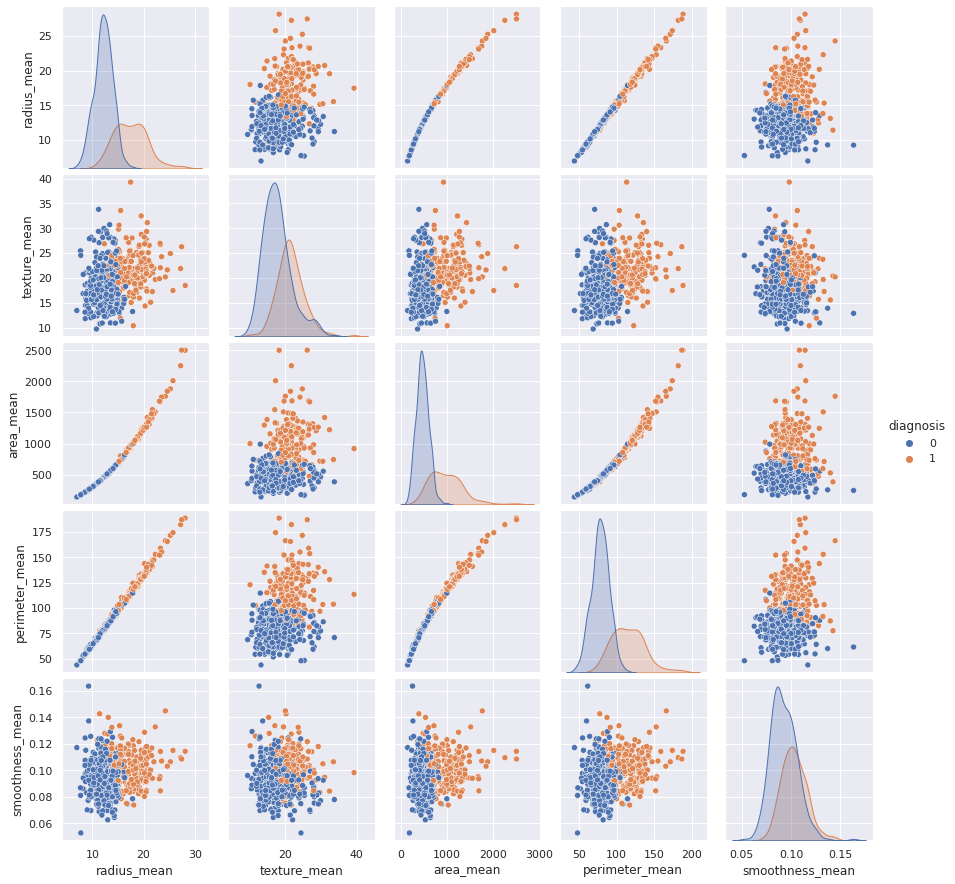

In [11]:
# Visualisasi data
sns.pairplot(df_kanker, vars = ['radius_mean', 'texture_mean', 'area_mean', 'perimeter_mean', 'smoothness_mean'], hue = 'diagnosis')

Buat heatmap untuk melihat korelasi antara semua kolom yang ada di df_kanker.

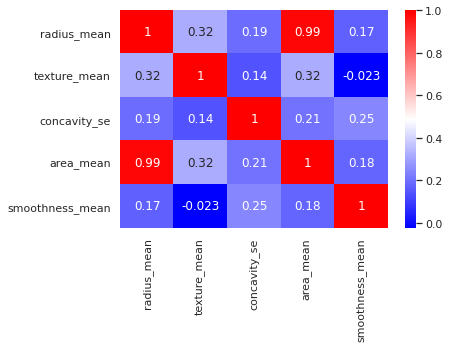

In [12]:
# Plot korelasi dengan heatmap
sns.heatmap(df_kanker[['radius_mean', 'texture_mean', 'concavity_se', 'area_mean','smoothness_mean']].corr(), annot=True, cmap='bwr')

Warna merah tua menunjukkan bahwa hubungan korelasi antar dua variabel positif. Artinya jika satu data naik, maka data satunya lagi ikut naik.Sementara warna biru tua menunjukkan hubungan korelasi negatif. Artinya jika satu data naik, maka data satunya lagi justru turun, dan begitu sebaliknya.

Proses eksplorasi dan merapihkan data sudah selesai. Selanjutnya menyiapkan data untuk model dengan melakukan *splitting the data set* atau memecah data set menjadi *feature data set* atau variabel independen (x) dan *target data set* atau variabel dependen (y).

In [13]:
# Persiapan training data set
X = df_kanker.iloc[:, 2:31].values    #semua kolom selain kolom 'diagnosis'
Y = df_kanker.iloc[:, 1].values       #kolom 'diagnosis'

Lakukan pemecahan data lagi, menjadi 75% Training data set dan 25% Testing data set.

In [14]:
# Membagi dataset ke training set dan test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

Lakukan *feature scaling* yaitu mentransformasikan *feature data*/independen menjadi nilai dalam rentang tertentu misalnya dari -1 sampai 1 melalui aritmatika standardisasi atau dengan rentang 0 sampai 1 dengan aritmatika normalisasi.



In [15]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Buat dan lakukan training pada model SVM yang akan mendeteksi ada atau tidaknya kanker.

In [16]:
# Proses training dengan SVM
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(X_train, Y_train)
Y_predict = classifier.predict(X_test)
print(classification_report(Y_test, Y_predict))
#Another way to get the models accuracy on the test data
print("Support Vector Machine (RBF Classifier) Training Accuracy Score = {}".format(accuracy_score(Y_test, Y_predict)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        67
           1       1.00      0.96      0.98        47

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Support Vector Machine (RBF Classifier) Training Accuracy Score = 0.9824561403508771


Keterangan dari *classification report*:
*   Precision: Berapa banyak yang berhasil dideteksi di class tersebut.
*   Recall: Berapa banyak class ini yang berhasil ditemukan dibandingkan dengan class lain.
*   Precision dan recall sangat berguna jika datanya tidak imbang (imbalanced). Jadi jika datanya imbang, cukup dilihat F1-score nya saja.
*   F1-score: Harmonisasi antara prediksi dan recall (tingkat akurasi total).
*   Support: Berapa banyak item yang diprediksi di class ini.



**Confusion Matrix**

>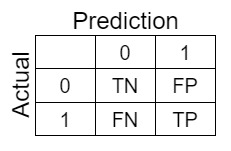

*   ***True Negative (TN)***: Spesifisitas, menunjukkan data yang benar-benar negatif.
*   ***False Negative (FN)***: Hasil tes yang menunjukkan negatif, padahal sebenarnya positif.
*   ***True Positive (TP)***: Sensitivitas, menunjukkan data yang benar-benar positif.
*   ***False Positive (FP)***: Hasil tes yang menunjukkan positif, padahal sebenarnya negatif.

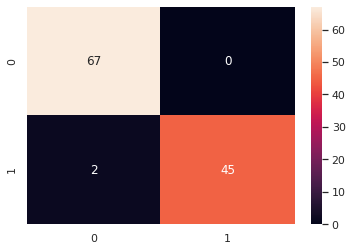

In [17]:
# Mengevaluasi model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_predict)
sns.heatmap(cm, annot=True)

*Confusion matrix* di atas menunjukkan bahwa hasil prediksi dengan model SVM sangat baik. (**TN**) Model berhasil mendeteksi kanker Benign (0) sebanyak 67 kali. (**FN**) Model dengan salah mendeteksi kanker Benign (0) sebanyak 2 kali, seharusnya kanker Malignant (1). (**FP**) Model tidak melakukan kesalahan dalam mendeteksi kanker Malignant (1). (**TP**) Model berhasil mendeteksi kanker Malignant (1) sebanyak 45 kali.

References:

*   [MegaBagus.id](https://www.megabagus.id/mendeteksi-kanker-payudara-dengan-machine-learning/)
*   [Medium.com](https://randerson112358.medium.com/breast-cancer-detection-using-machine-learning-38820fe98982)



### -

In [18]:
#Using KNeighborsClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
print(classification_report(Y_test, Y_predict))

#Another way to get the models accuracy on the test data
print(accuracy_score(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        67
           1       1.00      0.89      0.94        47

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

0.956140350877193


In [19]:
def models(X_train,Y_train):
  
  #Using Logistic Regression 
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, Y_train)
  
  #Using KNeighborsClassifier 
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)

  #Using SVC linear
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state = 0)
  svc_lin.fit(X_train, Y_train)

  #Using SVC rbf
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(X_train, Y_train)

  #Using GaussianNB 
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, Y_train)

  #Using DecisionTreeClassifier 
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)
  
  #print model accuracy on the training data.
  print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
  print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
  print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))
  print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))
  print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
  print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
  print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
  
  return log, knn, svc_lin, svc_rbf, gauss, tree, forest

# Eksekusi Fungsi
model = models(X_train, Y_train)

[0]Logistic Regression Training Accuracy: 0.9912087912087912
[1]K Nearest Neighbor Training Accuracy: 0.9802197802197802
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.9868131868131869
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.9846153846153847
[4]Gaussian Naive Bayes Training Accuracy: 0.9494505494505494
[5]Decision Tree Classifier Training Accuracy: 1.0
[6]Random Forest Classifier Training Accuracy: 0.9978021978021978
